# Assignment

## Brief

Write the Python codes for the following questions.

## Instructions

Paste the answer as Python in the answer code section below each question.

### Question 1

Question: The scraping of `https://www.scrapethissite.com/pages/forms/` in the last section assumes a hardcoded (fixed) no of pages. Can you improve the code by removing the hardcoded no of pages and instead use the `»` button to determine if there are more pages to scrape? Hint: Use a `while` loop.





In [47]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

def parse_and_extract_rows(soup: BeautifulSoup):
    """
    Extract table rows from the parsed HTML.
    """
    header = soup.find('tr')
    headers = [th.text.strip() for th in header.find_all('th')]
    teams = soup.find_all('tr', 'team')
    for team in teams:
        row_dict = {}
        for h, col in zip(headers, team.find_all('td')):
            row_dict[h] = col.text.strip()
        yield row_dict


Answer:

In [71]:
all_rows = []
page_num = 1

while True:
    print(f"\nFetching page {page_num}...")
    r = requests.get(f"https://www.scrapethissite.com/pages/forms/?page_num={page_num}")
    soup = BeautifulSoup(r.text, "html.parser")

    # Extract rows for this page
    page_rows = list(parse_and_extract_rows(soup))
    
    # Break if no rows found
    if not page_rows:
        print(f"No rows found on page {page_num}. Exiting loop.")
        break

    # Add to master list
    all_rows.extend(page_rows)  
    print(f"Page {page_num} rows added: {len(page_rows)}")
    
    page_num += 1
    time.sleep(1)

# Convert to DataFrame
df = pd.DataFrame(all_rows)
print(f"\nTotal rows extracted: {len(df)}")

# Save to CSV
df.to_excel("all_pages_data.xlsx", index=False)
print("Data saved to all_pages_data.xlsx")


Fetching page 1...
Page 1 rows added: 25

Fetching page 2...
Page 2 rows added: 25

Fetching page 3...
Page 3 rows added: 25

Fetching page 4...
Page 4 rows added: 25

Fetching page 5...
Page 5 rows added: 25

Fetching page 6...
Page 6 rows added: 25

Fetching page 7...
Page 7 rows added: 25

Fetching page 8...
Page 8 rows added: 25

Fetching page 9...
Page 9 rows added: 25

Fetching page 10...
Page 10 rows added: 25

Fetching page 11...
Page 11 rows added: 25

Fetching page 12...
Page 12 rows added: 25

Fetching page 13...
Page 13 rows added: 25

Fetching page 14...
Page 14 rows added: 25

Fetching page 15...
Page 15 rows added: 25

Fetching page 16...
Page 16 rows added: 25

Fetching page 17...
Page 17 rows added: 25

Fetching page 18...
Page 18 rows added: 25

Fetching page 19...
Page 19 rows added: 25

Fetching page 20...
Page 20 rows added: 25

Fetching page 21...
Page 21 rows added: 25

Fetching page 22...
Page 22 rows added: 25

Fetching page 23...
Page 23 rows added: 25

Fetch

##### Appendix 

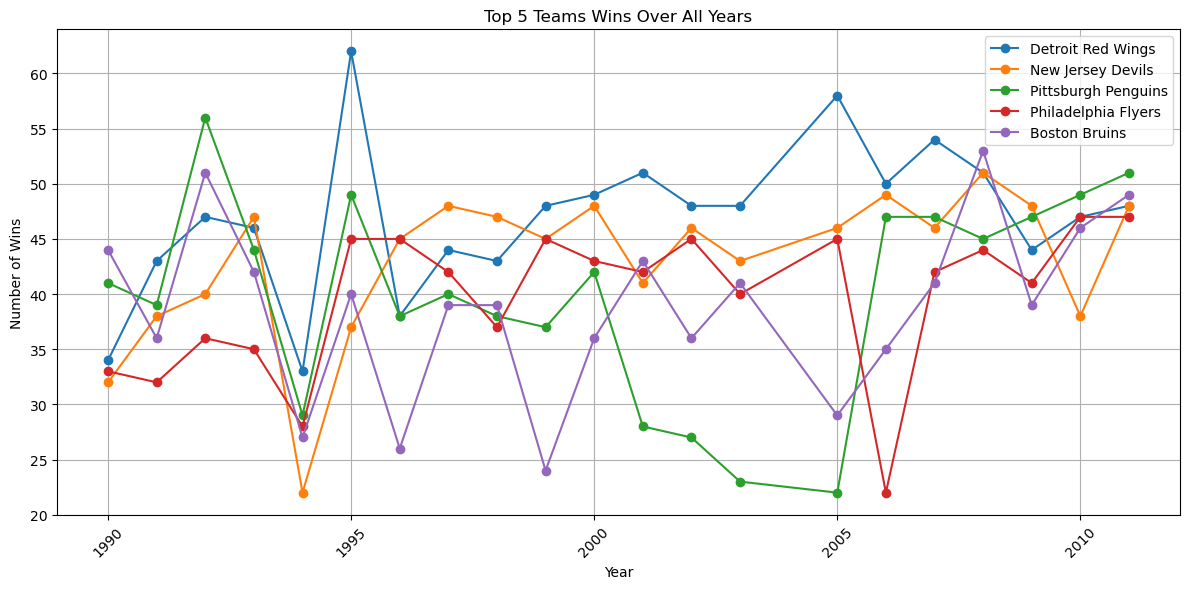

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Wins and Year are numeric
df["Wins"] = pd.to_numeric(df["Wins"], errors='coerce').fillna(0).astype(int)
df["Year"] = pd.to_numeric(df["Year"], errors='coerce').astype(int)

# Top 5 teams by total wins
top_teams = df.groupby("Team Name")["Wins"].sum().sort_values(ascending=False).head(5).index.tolist()

# Filter dataset for top teams
df_top = df[df["Team Name"].isin(top_teams)].copy()

# Pivot table: Years as rows, Teams as columns, values = Wins
pivot_wins = df_top.pivot_table(
    index="Year",
    columns="Team Name",
    values="Wins",
    aggfunc="sum",
    fill_value=0
)

# Sort columns by total wins descending
totals = pivot_wins.sum().sort_values(ascending=False).index.tolist()
pivot_wins = pivot_wins[totals]

# Apply rolling mean to smooth curves (window=3)
pivot_smooth = pivot_wins.rolling(window=1, min_periods=1).mean()

# Plotting
plt.figure(figsize=(12, 6))
for team in pivot_smooth.columns:
    plt.plot(pivot_smooth.index, pivot_smooth[team], marker='o', label=team)

plt.title("Top 5 Teams Wins Over All Years")
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()